In [9]:
"""
>> Frequency distribution of attributes for each component
>> Characterstics of attributes - are some attributes specific to a component?
"""

'\n>> Frequency distribution of attributes for each component\n>> Characterstics of attributes - are some attributes specific to a component?\n'

In [1]:
import os
from json import loads, load
import pandas as pd
from tqdm import tqdm
import collections
from collections import defaultdict

In [2]:
import joblib
import matplotlib.pyplot as plt

In [3]:
def get_keys(dictionary):
    result = []
    for key, value in dictionary.items():
        if type(value) is dict:
            new_keys = get_keys(value)
            result.append(key)
            for innerkey in new_keys:
                result.append(f'{key}/{innerkey}')
        else:
            result.append(key)
    return result

def convert_to_key(y):
    my_key = ''
    for x in y.split('/'):
        my_key += f'[{x}]'
    return my_key

In [4]:
try_dict = {"1":1, "2":2, "3":{4:4, 5:5, 6:"a", 7:{3:3, 5:"d"}}, "9":9}
c = get_keys(try_dict)
c
# get_value_type(try_dict)
# try_dict[3][7][3]

['1', '2', '3', '3/4', '3/5', '3/6', '3/7', '3/7/3', '3/7/5', '9']

100%|██████████| 2706/2706 [00:00<00:00, 54833.60it/s]

Card


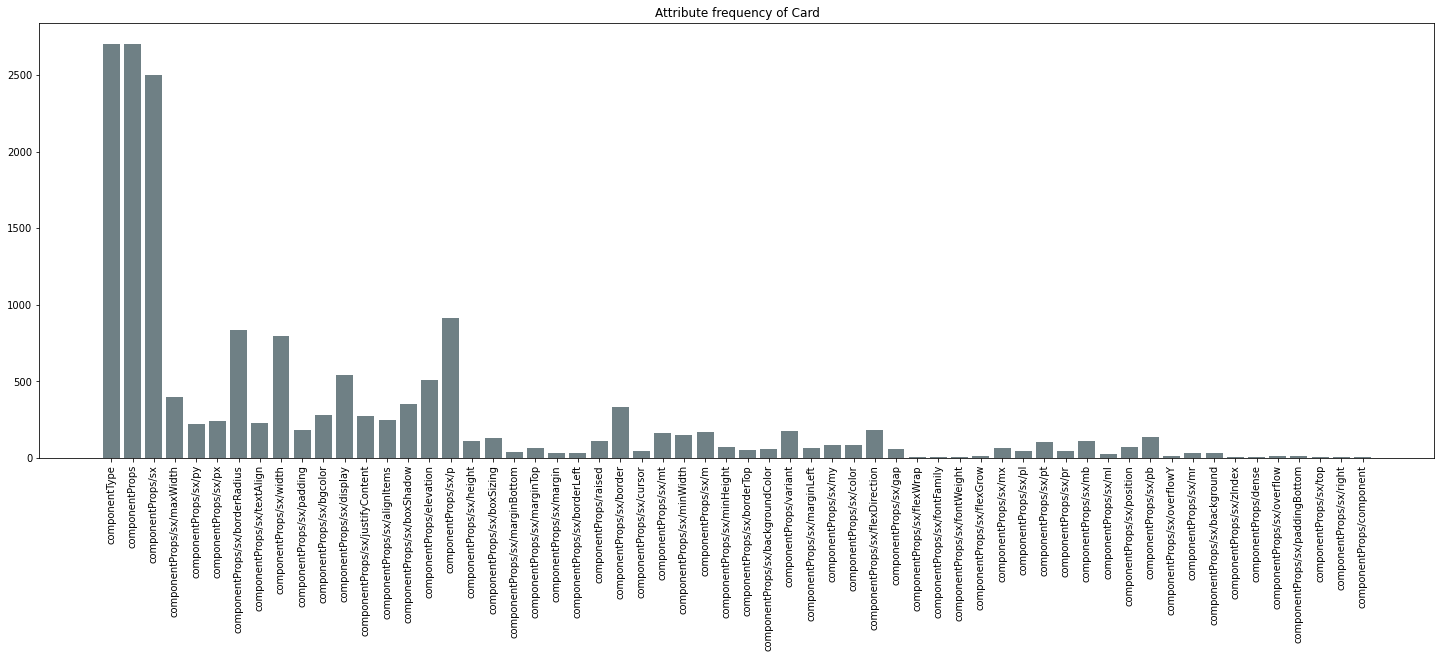

100%|██████████| 402/402 [00:00<00:00, 51125.23it/s]

Switch


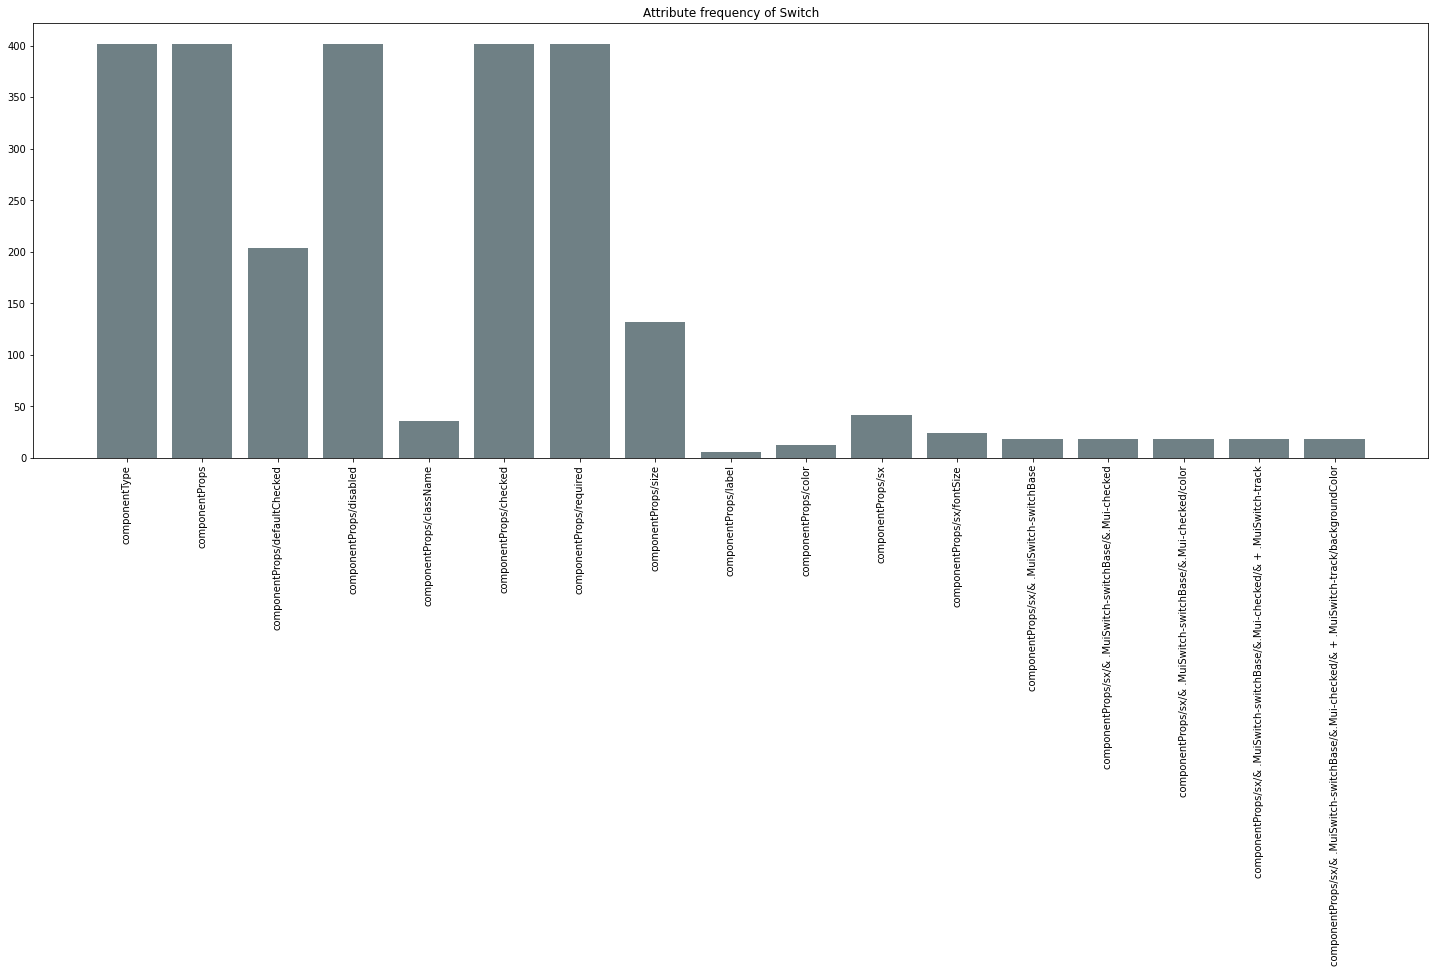

100%|██████████| 3296/3296 [00:00<00:00, 42924.60it/s]

Button


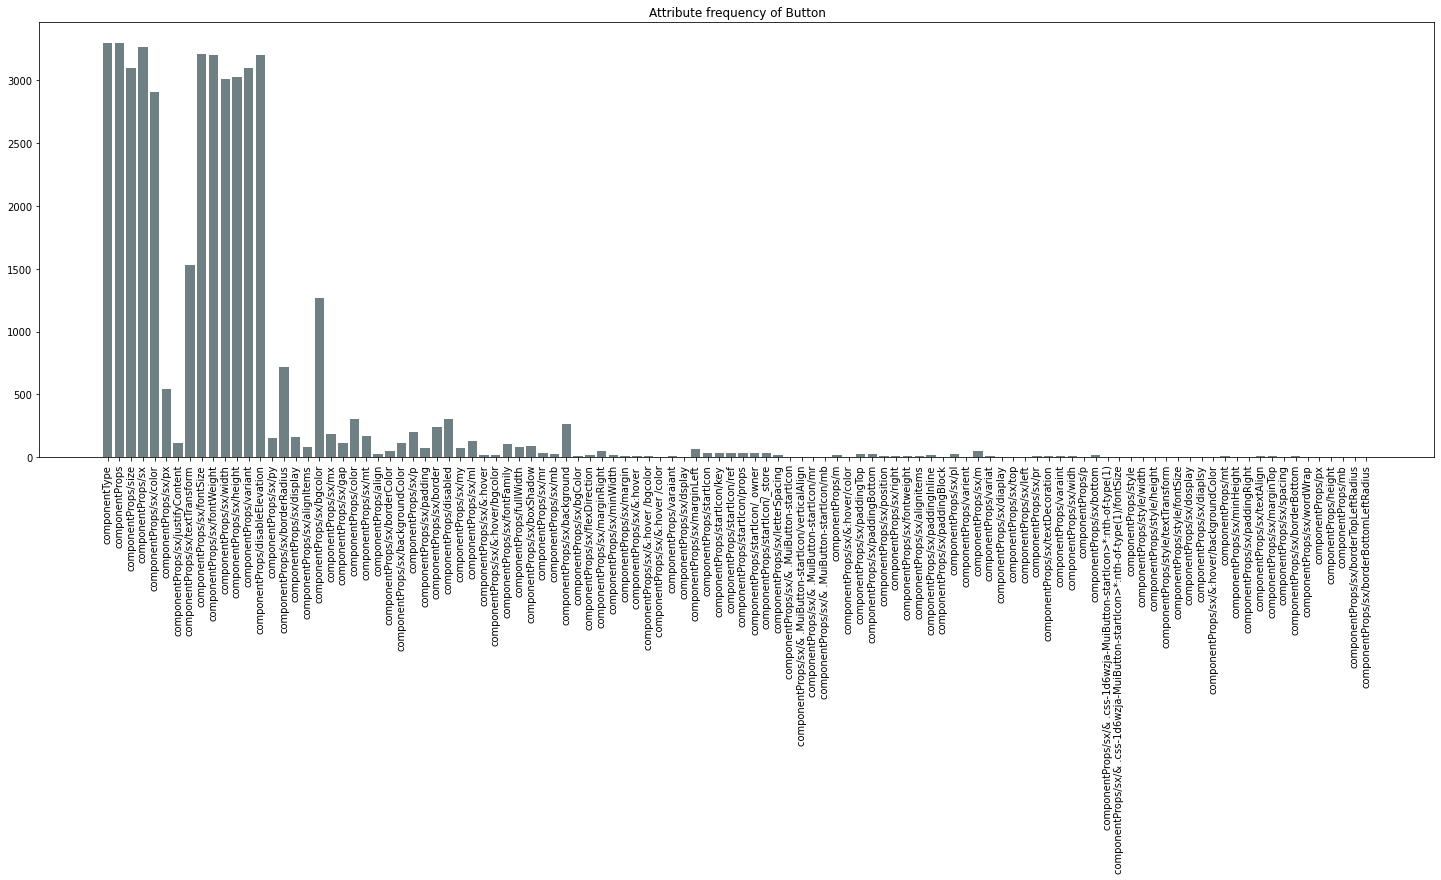

100%|██████████| 5791/5791 [00:00<00:00, 62016.07it/s]

Icon


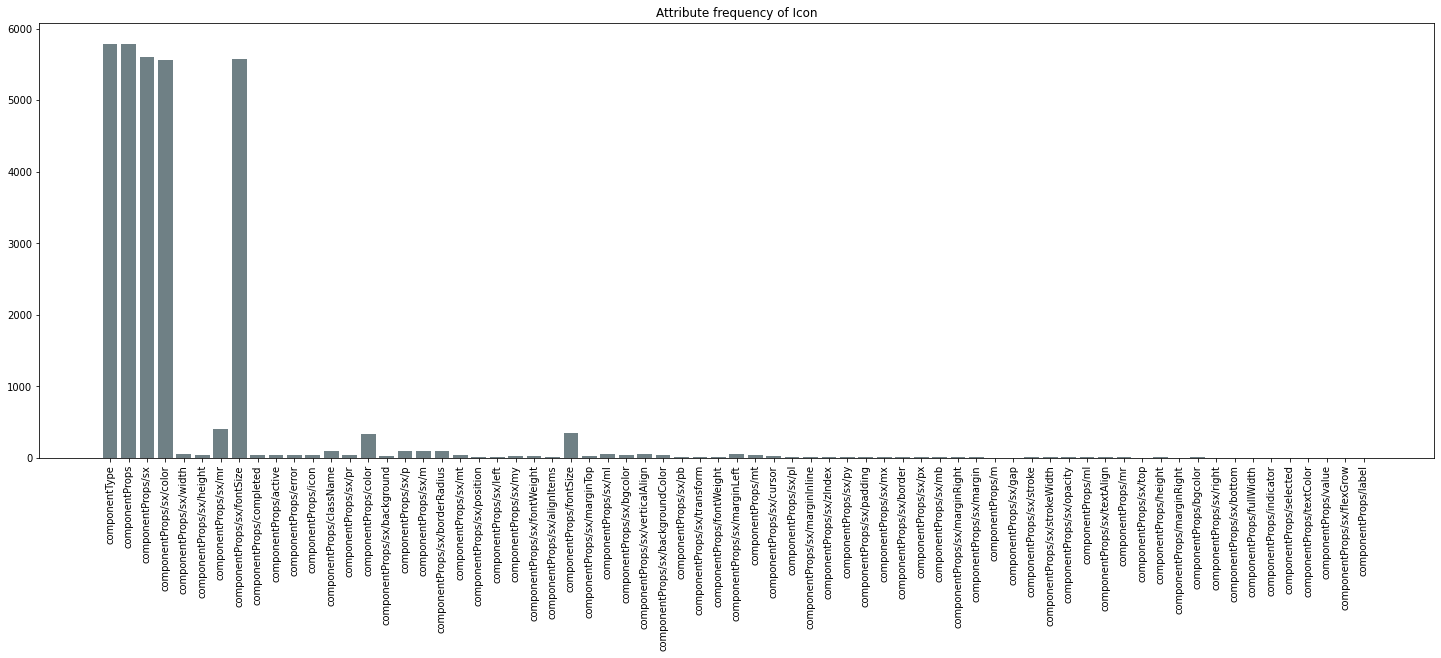

100%|██████████| 1614/1614 [00:00<00:00, 54397.51it/s]

Checkbox


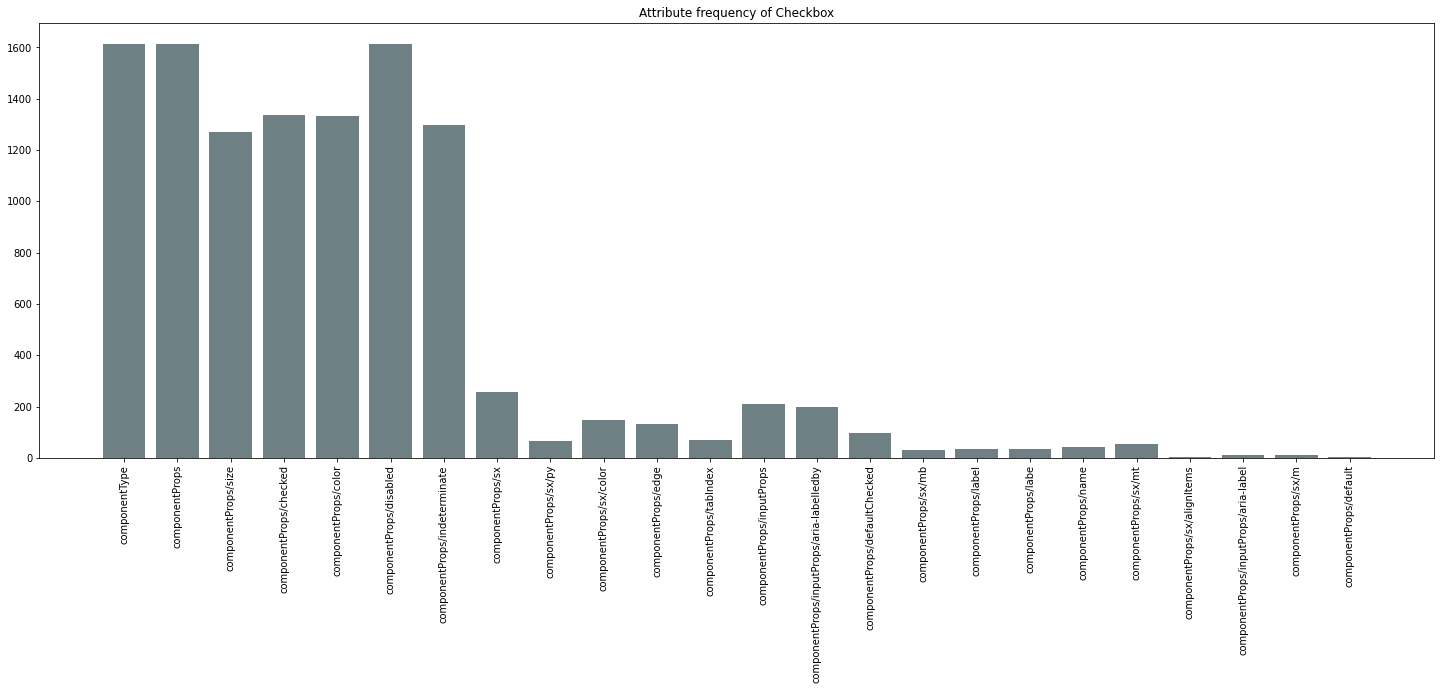

In [5]:
main_fol_path = "../data/raw/"
attribute_dict_list = []
for component in os.listdir(main_fol_path):
    fol_path = f"{main_fol_path}{component}"
    print(component)
    json_file_paths = os.listdir(fol_path)
    json_file_paths = [component for component in json_file_paths if component.split('.')[1] == "json"]

    meta_attributes = []
    for path in tqdm(json_file_paths):
        json_file =  open(f"{fol_path}/{path}")
        data = load(json_file)
        meta_attributes += get_keys(data)
        json_file.close()

    attribute_dict = dict(collections.Counter(meta_attributes))

    plt1 = plt.figure(figsize=(25, 8))
    plt.title(f"Attribute frequency of {component}")
    plt.bar(range(len(attribute_dict)), attribute_dict.values(), color="#6f8085")
    plt.xticks(range(len(attribute_dict)),labels=attribute_dict.keys(), rotation=90)
    plt.show()

    joblib.dump(attribute_dict, f"attribute_dict_{component}")

    attribute_dict_list.append((component, meta_attributes))